In [42]:
import PIL
import matplotlib.pyplot as plt
import numpy
from numpy import linalg
from PIL import Image
import glob

#
#x = PIL.Image.open("fotos/flickr_dog_000002.jpg").resize((64,64), Image.BILINEAR)
#I = numpy.asarray(PIL.Image.open('fotos/flickr_dog_000002.jpg'))
#print(x.size)


filelist = glob.glob('fotos/*.jpg')
y = numpy.array([numpy.array(Image.open(fname).resize((64,64), Image.BILINEAR),dtype=numpy.int32) for fname in filelist])


y = y.reshape(5239,4096,3)


red = y[:,:,0]
blue = y[:,:,2]
green = y[:,:,1]



meanRed = numpy.mean(red,axis = 0)
tmpRed = red - meanRed

meanBlue = numpy.mean(blue,axis = 0)
tmpBlue = blue - meanBlue

meanGreen = numpy.mean(green,axis = 0)
tmpGreen = green - meanGreen


covarianceRed = numpy.cov(tmpRed, rowvar = False)
covarianceBlue = numpy.cov(tmpBlue,rowvar = False)
covarianceGreen = numpy.cov(tmpGreen,rowvar = False)


redEigenVals,redEigenVecs = numpy.linalg.eigh(covarianceRed )
blueEigenVals,blueEigenVecs = numpy.linalg.eigh(covarianceBlue )
greenEigenVals,greenEigenVecs = numpy.linalg.eigh(covarianceGreen )


redDec = redEigenVecs[:,::-1]
blueDec = blueEigenVecs[:,::-1]
greenDec = greenEigenVecs[:,::-1]



redImages = redDec.transpose().reshape(-1, 64, 64)
blueImages = blueDec.transpose().reshape(-1, 64, 64)
greenImages = greenDec.transpose().reshape(-1, 64, 64)



C:\Users\nkyah\AppData\Local\Temp\ipykernel_2508\686276656.py:15: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  y = numpy.array([numpy.array(Image.open(fname).resize((64,64), Image.BILINEAR),dtype=numpy.int32) for fname in filelist])


In [55]:

print(redEigenVals)
print("PVE for first 10 PCA for R channel")
k = 10
sum = 0
sum2 = 0
for x in range(0,4096,1):
    sum = sum + redEigenVals[x]
for x in range(4095,4095-k,-1):
    print(redEigenVals[x] / sum)
    sum2 = sum2 + redEigenVals[x] / sum
print("Total of first ten",sum2)




[1.49708573e-01 1.54477851e-01 1.60049832e-01 ... 1.30833650e+06
 2.36104352e+06 3.74969641e+06]
PVE for first 10 PCA for R channel
0.2150928295705477
0.13543590648775347
0.07504975573273255
0.051732173423000065
0.042289430973505064
0.024583277160715414
0.021772692745900598
0.01989857869202319
0.017070945760386022
0.016559603292283374
Total of first ten 0.6194851938388473


In [15]:
print("PVE for first 10 PCA for G channel")
k = 10
sum = 0
sum2 = 0
for x in range(0,4096,1):
    sum = sum + greenEigenVals[x]
for x in range(4095,4095-k,-1):
    print(greenEigenVals[x] / sum)
    sum2 = sum2 + greenEigenVals[x] / sum
print("Total of first ten",sum2)

PVE for first 10 PCA for G channel
0.20045939393456677
0.13767809111140286
0.07695367428026664
0.053971234550888966
0.042918749347138435
0.02602259159431511
0.021426529166701794
0.02081297174873692
0.017393519667203514
0.016811649418805575
Total of first ten 0.6144484048200265


In [54]:
print("PVE for first 10 PCA for B channel")
k = 10
sum = 0
sum2 = 0 
for x in range(0,4096,1):
    sum = sum + blueEigenVals[x]
for x in range(4095,4095-k,-1):
    print(blueEigenVals[x] / sum)
    sum2 = sum2 + blueEigenVals[x] / sum
print("Total of first ten",sum2)

PVE for first 10 PCA for B channel
0.22997247957206093
0.13678519667322303
0.07034022694974625
0.05356417895492501
0.039821729668577395
0.023732379074596726
0.020992185120820368
0.020758669377520095
0.01668136288830136
0.016293072799311456
Total of first ten 0.6289414810790827


In [56]:

sum = 0
sum2 = 0
for x in range(0,4096,1):
    sum = sum + redEigenVals[x]
for x in range(4095,-1,-1):
    if ( sum2 > 0.7):
        req = 4095-x
        break
    sum2 = sum2 + redEigenVals[x] / sum
    
print( "For channel R, to obtain %70 percent required number of PCA is:",req )


sum = 0
sum2 = 0
for x in range(0,4096,1):
    sum = sum + greenEigenVals[x]
for x in range(4095,-1,-1):
    if ( sum2 > 0.7):
        req = 4095-x
        break
    sum2 = sum2 + greenEigenVals[x] / sum
    
print( "For channel G, to obtain %70 percent required number of PCA is:",req )


sum = 0
sum2 = 0
for x in range(0,4096,1):
    sum = sum + blueEigenVals[x]
for x in range(4095,-1,-1):
    if ( sum2 > 0.7):
        req = 4095-x
        break
    sum2 = sum2 + blueEigenVals[x] / sum

print( "For channel B, to obtain %70 percent required number of PCA is:",req )

For channel R, to obtain %70 percent required number of PCA is: 18
For channel G, to obtain %70 percent required number of PCA is: 19
For channel B, to obtain %70 percent required number of PCA is: 17


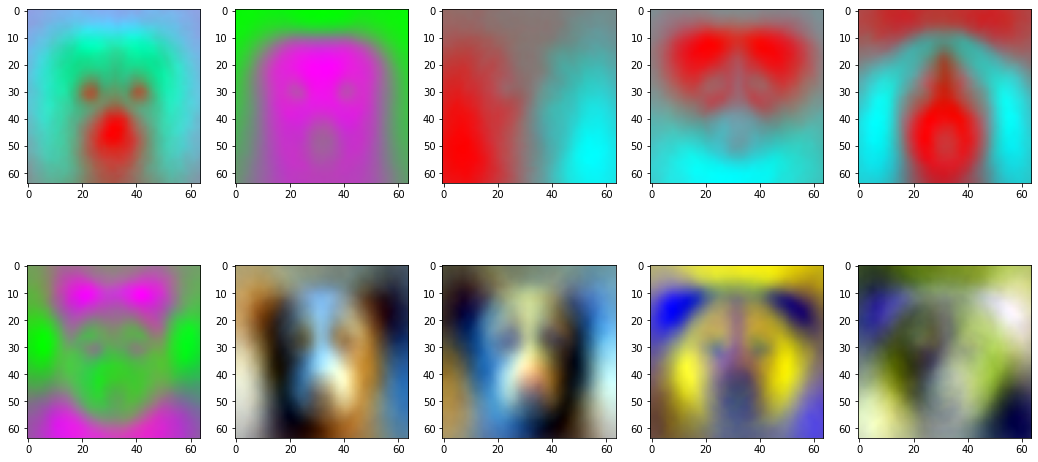

In [48]:


image = numpy.full((4096,64,64,3),0)
redChannel = numpy.full((4096,64,64),0.0)
greenChannel = numpy.full((4096,64,64),0.0)
blueChannel = numpy.full((4096,64,64),0.0)
for i in range(0,4096):
    max_value = redImages[i].max()
    min_value = redImages[i].min()
    redChannel[i] = (redImages[i] - min_value) / (max_value - min_value)

    max_value = blueImages[i].max()
    min_value = blueImages[i].min()
    blueChannel[i] = (blueImages[i] - min_value) / (max_value - min_value)

    max_value = greenImages[i].max()
    min_value = greenImages[i].min()
    greenChannel[i] = (greenImages[i] - min_value) / (max_value - min_value)
    image[i] =   (numpy.dstack((redChannel[i],greenChannel[i],blueChannel[i]))*255.99 ) .astype(numpy.uint8)



axis = plt.figure(figsize = (18, 18))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])








Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


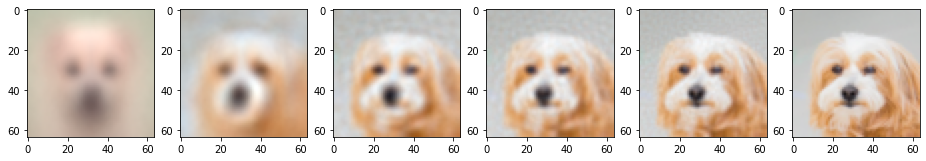

In [57]:



axis = plt.figure(figsize = (16, 16))
k = (1, 50, 250,500,1000,4096)


l = 1
for i in k:
    redtmp = redDec[:,:i]
    redconstructedImage = numpy.matmul(tmpRed[0],redtmp)
    redreconstructedImage = numpy.matmul(redconstructedImage,redtmp.T) + meanRed

    greentmp = greenDec[:,:i]
    greenconstructedImage = numpy.matmul(tmpGreen[0],greentmp)
    greenreconstructedImage = numpy.matmul(greenconstructedImage,greentmp.T) + meanGreen


    bluetmp = greenDec[:,:i]
    blueconstructedImage = numpy.matmul(tmpBlue[0],bluetmp)
    bluereconstructedImage = numpy.matmul(blueconstructedImage,bluetmp.T) + meanBlue


    reConstructedimage =   (numpy.dstack((redreconstructedImage.reshape(64,64),greenreconstructedImage.reshape(64,64),bluereconstructedImage.reshape(64,64))) ) .astype(int)
    plt.subplot(1,6,l)
    plt.imshow(reConstructedimage)
    l = l+1
    